In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

# 1.Loading the data

In [4]:
df=pd.read_csv("spam.csv",encoding="latin-1",usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 2.Exploring the data

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [14]:
# droping duplicates
df = df.drop_duplicates(keep="first")

# Again checking for duplicate values
df.duplicated().sum()


0

In [10]:
# Ham(0) & Spam(1) counts
df["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

# 3.Data Visualization

# 1.Bar Plot for Category Distribution

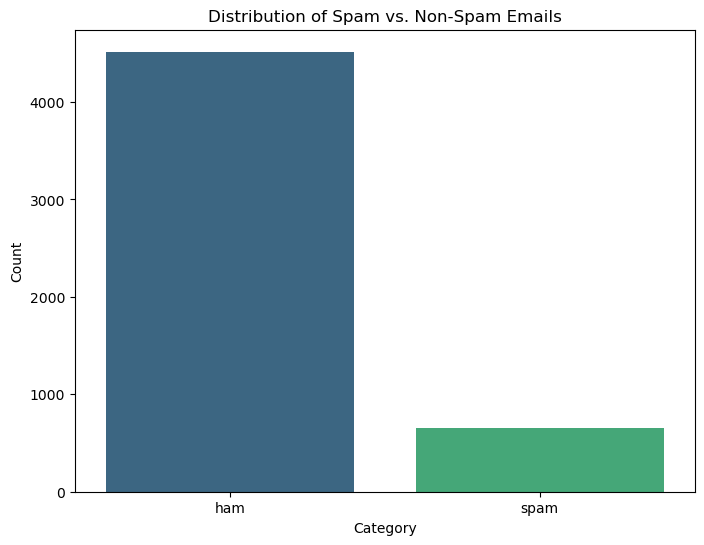

In [12]:
# Bar plot to show the count of each category
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 4.Text Preprocessing

In [16]:
# Renaming the columns
df.rename(columns={"v1": "Target","v2": "Text"}, inplace = True)
df

,Target,Text,Processed_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tri contact u u pound prize claim easi ca...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy someth els ...


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Text preprocessing function
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. Tokenization
    tokens = text.split()
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Stemming (or use lemmatization instead)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 6. (Optional) Remove non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the text column
df.loc[:, 'Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the processed data
print(df[['Text', 'Processed_Text']])

                                                   Text  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                         Processed_Text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri wkli comp win fa cup final tkt may ...  
3                   u dun say earli hor u c alreadi say  
4

In [ ]:
# 5.Machine Learning Model for Spam Detection

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(df["Target"]).toarray()
y=pd.get_dummies(df["Target"],drop_first=True).values.ravel()

print(X.shape,y.shape)


(5169, 2) (5169,)


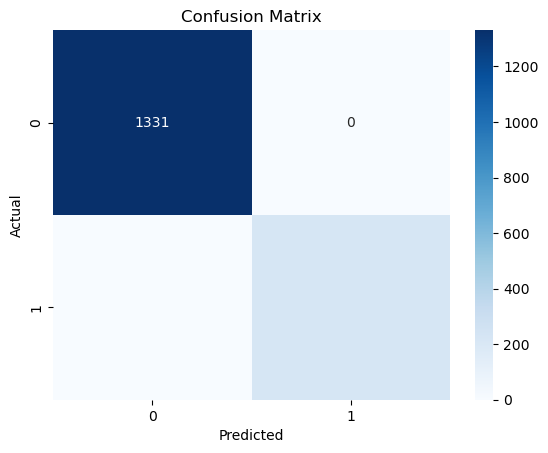

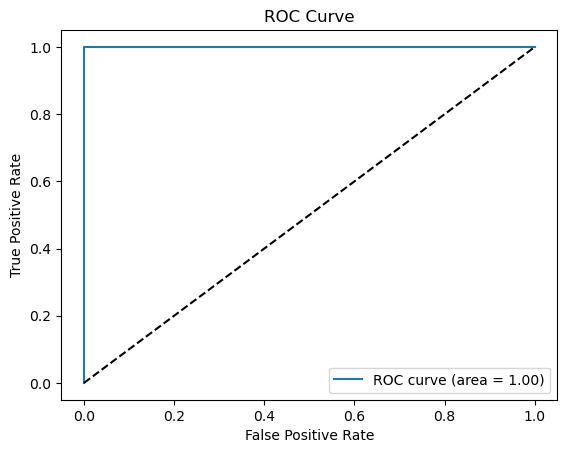

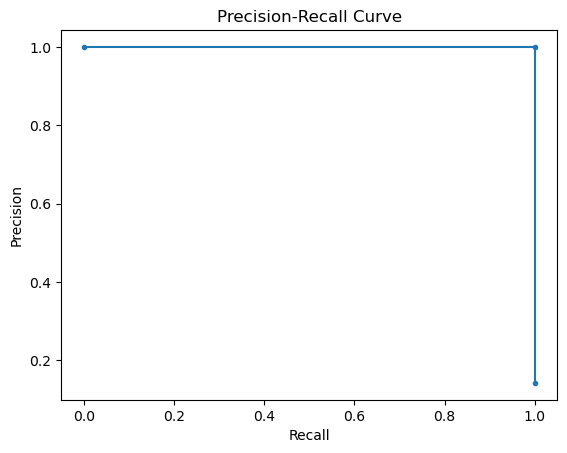

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train a model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [68]:
def classify(spam):
    email = [preprocess_text(text) for text in spam]
    tf=tfidf.transform([spam]).toarray()
    preds=model.predict(tf)
    return "spam" if preds==0 else "ham"

#Testing
sample1="Congratulations! You've won a $1000 gift card. Call now!"
print(classify(sample1))


spam
